# Luis Eduardo Robles Jiménez

### Natural Language Processing

### Practica 3: BoW y Esquemas de pesado

In [6]:
def get_texts_from_file(path_corpus, path_truth):
    txt = []
    y = []
    with open(path_corpus, "r") as f_corpus, open(path_truth, "r") as f_truth:
        for tuit in f_corpus:
            txt += [tuit]
        for label in f_truth:
            y += [label] 
    return txt, list(map(int, y))

#### BOW train

In [7]:
tr_txt, tr_y = get_texts_from_file("../data/agresividad/mex_train.txt", "../data/agresividad/mex_train_labels.txt")

In [8]:
len(tr_txt)

5544

In [9]:
len(tr_y)

5544

In [10]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

Counter({0: 3563, 1: 1981})


Text(0.5, 0, 'Class')

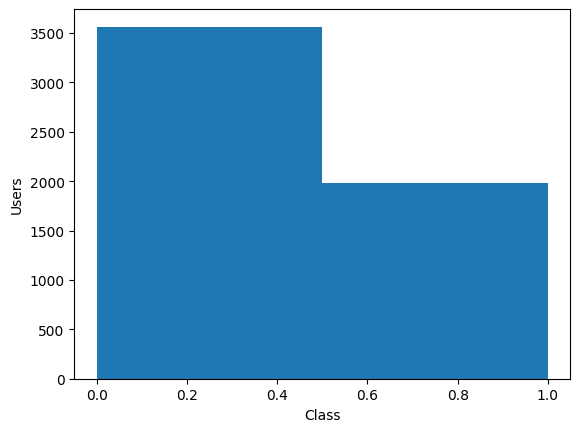

In [11]:
# See dist of labels

print(Counter(tr_y))

plt.hist(tr_y, bins=len(set(tr_y)))
plt.ylabel('Users')
plt.xlabel('Class')

In [12]:
tr_txt[:10]

['lo peor de todo es que no me dan por un tiempo y luego vuelven estoy hasta la verga de estl\n',
 'a la vga no seas mamón 45 putos minutos después me dices que apenas sales no me querías avisar en 3 horas? 😑\n',
 'considero que lo más conveniente seria que lo retes a unos vergazos mi jelipe! rómpele la madre a ese pinchi joto!\n',
 'el marica de mi ex me tiene bloqueada de todo así  uno no puede admirar la "belleza" de su garnacha 😂\n',
 'mujer despechadaya pinche amlo hazle esta que se pela la loca #reynosafollow #reynosa\n',
 'putos. no tienen madre. ambriados mantenidos. ojetes. como es posible. mejor matarlos\n',
 'ustedes si puden andar de chanceros pero cuidadito y seamos nosotras porque luego luego empiezan a mamar hijos de la chingada.\n',
 '@usuario jajjaja te digo esa madre si está buena ajjaja\n',
 'odio los putos trámites de titulación 😡😡😡😡😡😡😡😡😡😡😡 pero me urge la precedula.\n',
 '@usuario no te equivocabas mi madre y tu tenían muchísima razón siempre es mejor lo que viene 

In [13]:
# Split doesn't quite work because of punctuation

set(tr_txt[5].split()) 

{'ambriados',
 'como',
 'es',
 'madre.',
 'mantenidos.',
 'matarlos',
 'mejor',
 'no',
 'ojetes.',
 'posible.',
 'putos.',
 'tienen'}

In [14]:
import nltk 
from nltk.tokenize import TweetTokenizer # Tokenizer for social networks

In [15]:
tokenizer = TweetTokenizer()

## Tokenizar un tweet

In [16]:
tokenizer.tokenize(tr_txt[5])

['putos',
 '.',
 'no',
 'tienen',
 'madre',
 '.',
 'ambriados',
 'mantenidos',
 '.',
 'ojetes',
 '.',
 'como',
 'es',
 'posible',
 '.',
 'mejor',
 'matarlos']

In [17]:
tokenizer.tokenize("Hola @nick como estas #felizdia bye!!! hola@")

['Hola',
 '@nick',
 'como',
 'estas',
 '#felizdia',
 'bye',
 '!',
 '!',
 '!',
 'hola',
 '@']

In [18]:
tokenizer.tokenize("https://www.youtube.com/watch?v=dhhS_g78X2E @")

['https://www.youtube.com/watch?v=dhhS_g78X2E', '@']

In [19]:
corpus_palabras = []
for doc in tr_txt:
    corpus_palabras += tokenizer.tokenize(doc) # A single list
    #corpus_palabras += [tokenizer.tokenize(doc)] # Creates a list of lists

In [20]:
len(set(corpus_palabras))

13580

In [21]:
fdist = nltk.FreqDist(corpus_palabras) # Frequency of each word
fdist

FreqDist({'que': 3383, 'de': 3357, '.': 2774, 'a': 2629, 'la': 2433, 'y': 2266, 'no': 1824, 'me': 1613, '!': 1505, 'el': 1303, ...})

In [22]:
def sortFreqDist(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

In [23]:
V = sortFreqDist(fdist) # Vocabulario
V = V[:5000]
V[:10]

[(3383, 'que'),
 (3357, 'de'),
 (2774, '.'),
 (2629, 'a'),
 (2433, 'la'),
 (2266, 'y'),
 (1824, 'no'),
 (1613, 'me'),
 (1505, '!'),
 (1303, 'el')]

In [24]:
dict_indices = dict()
cont = 0
for weight, word in V:
    dict_indices[word] = cont
    cont += 1
print(len(dict_indices))
list(dict_indices)[:10]

5000


['que', 'de', '.', 'a', 'la', 'y', 'no', 'me', '!', 'el']

In [25]:
val_txt, val_y = get_texts_from_file("../data/agresividad/mex_val.txt", "../data/agresividad/mex_val_labels.txt")

Counter({0: 397, 1: 219})


Text(0.5, 0, 'Class')

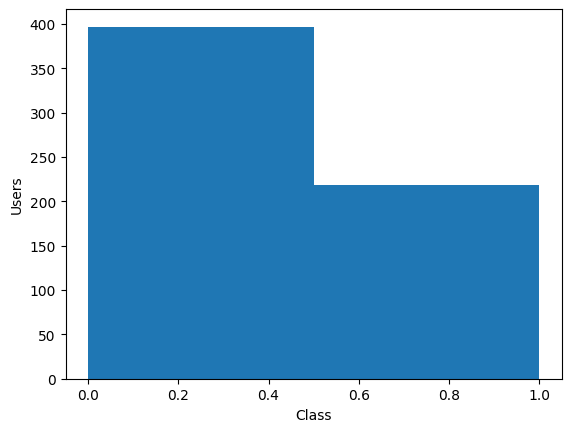

In [26]:
# See dist of labels
print(Counter(val_y))

plt.hist(val_y, bins=len(set(val_y)))
plt.ylabel('Users')
plt.xlabel('Class')

## Bag of Words

In [27]:
import numpy as np

### Binary bag of words

In [28]:
def my_build_binary_bow(tr_txt, V, dict_indices): #List of all tweets, vocabulary, ordered dict(word, freq)
    w_bound = 5000
    BOW = np.zeros((len(tr_txt), np.min((len(V), w_bound))), dtype = int)
    for i, t in enumerate(tr_txt):
        for j, w in enumerate(dict_indices):
            if j >= w_bound: break
            BOW[i, j] = w in t
    return BOW #Returns a matrix of nDocs x nWords (first 5000 words)
def build_binary_bow(tr_txt, V, dict_indices): #List of all tweets, vocabulary, ordered dict(word, freq)
    BOW = np.zeros((len(tr_txt),len(V)), dtype = int)
    cont_doc = 0
    for tr in tr_txt:
        fdist_doc = nltk.FreqDist(tokenizer.tokenize(tr))
        for word in fdist_doc:
            if word in dict_indices:
                BOW[cont_doc, dict_indices[word]] = 1
        cont_doc += 1
    return BOW #Returns a matrix of nDocs x nWords (first 5000 words)

### Frequency bag of words

In [29]:
def build_freq_bow(txt, V, dict_indices):
    BOW = np.zeros((len(txt),len(V)), dtype = int)
    for tweet_i, tweet in enumerate(txt):
        fdist_doc = nltk.FreqDist(tokenizer.tokenize(tweet))
        for word in fdist_doc:
            if word in dict_indices:
                BOW[tweet_i, dict_indices[word]] = fdist_doc[word]
    return BOW

### TF-IDF Bag of Words

$$ TFIDF_{t, d} = tf_{t, d} * idf_t $$

$$ tf_{t, d} = \frac{n_{t, d}}{Total \ terms \ in \ d} $$

$$ idf_t = log(\frac{Number \ of \ docs}{Docs \ with \ term \ t}) $$

In [30]:
def build_tfidf_bow(txt, V, dict_indices):
    freqs = dict()
    BOW = np.zeros((len(txt),len(V)), dtype = float)
    for tweet_i, tweet in enumerate(txt):
        tokens = tokenizer.tokenize(tweet)
        fdist_doc = nltk.FreqDist(tokens)
        for word in fdist_doc:
            if word in dict_indices:
                if not word in freqs: freqs[word] = 0
                freqs[word] += 1
                BOW[tweet_i, dict_indices[word]] = fdist_doc[word] / len(tokens) #* np.log(len(txt) / 1)
    for tweet_i, tweet in enumerate(txt):
        tokens = tokenizer.tokenize(tweet)
        fdist_doc = nltk.FreqDist(tokens)
        for word in fdist_doc:
            if word in dict_indices:
                BOW[tweet_i, dict_indices[word]] *= np.log(len(txt) / freqs[word])
    return BOW

## Bag of Concepts

### DOR

In [70]:
import math
def compute_dor(TR):
    TR_subset_in = TR
    DTR = np.zeros((TR_subset_in.shape[1], TR_subset_in.shape[0]), dtype=float)
    print("DOR: Shape of the input matrix (BoT):", TR.shape)
    print("DOR: Shape of the term-feat matrix:", DTR.shape)

    tam_V = TR_subset_in.shape[1]
    for doc, i in zip(TR_subset_in, range(len(TR_subset_in))):
        nonzero_positions = np.nonzero(doc)[0]
        tam_v = len(nonzero_positions)
        for term in nonzero_positions:
            DTR[term, i] = (1 + math.log10(doc[term])) * math.log10(tam_V/tam_v)
    return DTR

## Classification

In [49]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support

### Define model

In [50]:
parameters = {'C': [0.05, 0.25, 0.5, 1, 2]} # Complexity parameters
svr = svm.LinearSVC(class_weight = 'balanced') # The parameters tell the classifier to consider that the dataset is unbalanced
grid = GridSearchCV(estimator = svr, param_grid = parameters, n_jobs = -1, scoring = "f1_macro", cv = 5) # It's a validation technique: evaluates hyperparameters in a classifier; Use 8 logic processors; Try 5 different times

In [51]:
def evaluatePrediction(y_true, y_pred):
    p, r, f, _ = precision_recall_fscore_support(y_true, y_pred, average = 'macro', pos_label = 1)
    print(confusion_matrix(y_true, y_pred))
    print(metrics.classification_report(y_true, y_pred))

## Experiments

### Binary BOW

In [52]:
BOW_tr = build_binary_bow(tr_txt, V, dict_indices)
BOW_val = build_binary_bow(val_txt, V, dict_indices)
print("Training BOW:", BOW_tr.shape)
print("Validation BOW:", BOW_val.shape)

Training BOW: (5544, 5000)
Validation BOW: (616, 5000)


In [53]:
grid.fit(BOW_tr, tr_y)

GridSearchCV(cv=5, estimator=LinearSVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.05, 0.25, 0.5, 1, 2]}, scoring='f1_macro')

In [54]:
# Pretty good results for such simple model and a binary BOW
preds = grid.predict(BOW_val)
evaluatePrediction(val_y, preds)

[[329  68]
 [ 47 172]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       397
           1       0.72      0.79      0.75       219

    accuracy                           0.81       616
   macro avg       0.80      0.81      0.80       616
weighted avg       0.82      0.81      0.82       616



In [55]:
# False negatives
print(np.logical_and((val_y != preds), val_y).sum())
for i, t in enumerate(val_txt):
    if val_y[i] != preds[i] and val_y[i]:
        print(t)

47
así debería ser siempre para que se mueran a la verga

cada día me siento como un perro ovejero tratando de cuidar sus ovejas vale madre pinches rateros póngase a trabajar.😤

ya a cualquier prieto le dicen licenciado peludito tengan madre

su "pura vida" quedó en "pura verga" que se tragaron pinches ticos piojosos

la que se veía súper mal era demi lovato porque se mamo con el escote y el peinado le quedo feo

ya traigo mi actitud de lunes al cien pinches putos.  me pelan la verga todos

por qué verga mis compañeros de proyecto tienen que ser los más ineptos de todos

una novia intelectual una putona y otra luchona. para que entre las 3 se complementen.

putos locos yo llevo 6 horas y aún no salgo de la segunda isla no mamen.

no me gusta el fútbol pero por putos &gt;:v #noerapenal

me vale ver*** si el anda o anduvo con @usuario y después anda de puto jaja me vale si ya saben como es para que se quejan jajaja.😍

no  jajaja ya tiene mucho eso pero tan joto es el mugroso greñudo que 

### Frequency BOW

In [56]:
BOW_tr = build_freq_bow(tr_txt, V, dict_indices)
BOW_val = build_freq_bow(val_txt, V, dict_indices)
print("Training BOW:", BOW_tr.shape)
print("Validation BOW:", BOW_val.shape)

Training BOW: (5544, 5000)
Validation BOW: (616, 5000)


In [57]:
grid.fit(BOW_tr, tr_y)

GridSearchCV(cv=5, estimator=LinearSVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.05, 0.25, 0.5, 1, 2]}, scoring='f1_macro')

In [58]:
evaluatePrediction(val_y, grid.predict(BOW_val))

[[334  63]
 [ 49 170]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       397
           1       0.73      0.78      0.75       219

    accuracy                           0.82       616
   macro avg       0.80      0.81      0.80       616
weighted avg       0.82      0.82      0.82       616



### TF-IDF BOW

In [59]:
BOW_tr = build_tfidf_bow(tr_txt, V, dict_indices)
BOW_val = build_tfidf_bow(val_txt, V, dict_indices)
print("Training BOW:", BOW_tr.shape)
print("Validation BOW:", BOW_val.shape)

Training BOW: (5544, 5000)
Validation BOW: (616, 5000)


In [60]:
grid.fit(BOW_tr, tr_y)

GridSearchCV(cv=5, estimator=LinearSVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.05, 0.25, 0.5, 1, 2]}, scoring='f1_macro')

In [61]:
evaluatePrediction(val_y, grid.predict(BOW_val))

[[327  70]
 [ 54 165]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       397
           1       0.70      0.75      0.73       219

    accuracy                           0.80       616
   macro avg       0.78      0.79      0.78       616
weighted avg       0.80      0.80      0.80       616



### DOR - BOC

In [73]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2

In [74]:
BOW_tr = build_freq_bow(tr_txt, V, dict_indices)
DOR_base = compute_dor(BOW_tr)

DOR: Shape of the input matrix (BoT): (5544, 5000)
DOR: Shape of the term-feat matrix: (5000, 5544)


In [75]:
DOR_base = preprocessing.normalize(DOR_base, norm = "l2")

In [76]:
feats = SelectKBest(chi2, k = 1000)
feats.fit(BOW_tr, tr_y)

SelectKBest(k=1000, score_func=<function chi2 at 0x000001081193B160>)

In [84]:
best = feats.get_support(indices = True)
print(best.shape)

(1000,)


In [85]:
# Goes from word -> key to key -> word

dict_indice_invertido = {}
for w in dict_indices:
    dict_indice_invertido[dict_indices[w]] = w

In [88]:
t_words = [dict_indice_invertido[index] for index in best]

In [91]:
# dict_indices['palabra'] = 201
target_matrix = np.array([DOR_base[dict_indices[word]] for word in t_words])
target_matrix.shape

(1000, 5544)

In [93]:
from tsne import tsne

In [95]:
reduced_matrix = tsne(target_matrix, 2)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 1000...
Computing P-values for point 500 of 1000...
Mean value of sigma: 0.097964
Iteration 10: error is 17.492135
Iteration 20: error is 17.276334
Iteration 30: error is 17.015083
Iteration 40: error is 17.067097
Iteration 50: error is 17.039293
Iteration 60: error is 17.025156
Iteration 70: error is 17.019057
Iteration 80: error is 17.012525
Iteration 90: error is 17.013055
Iteration 100: error is 17.007561
Iteration 110: error is 2.012074
Iteration 120: error is 1.534978
Iteration 130: error is 1.346039
Iteration 140: error is 1.235778
Iteration 150: error is 1.165929
Iteration 160: error is 1.119721
Iteration 170: error is 1.086493
Iteration 180: error is 1.059860
Iteration 190: error is 1.038414
Iteration 200: error is 1.021266
Iteration 210: error is 1.007307
Iteration 220: error is 0.995243
Iteration 230: error is 0.984831
Iteration 240: error is 0.976542
Iteration 250: error is

In [96]:
reduced_matrix.shape

(1000, 2)

C:\Users\lalor\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128405 (\N{REVERSED HAND WITH MIDDLE FINGER EXTENDED}) missing from current font.
  func(*args, **kwargs)
C:\Users\lalor\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 127814 (\N{AUBERGINE}) missing from current font.
  func(*args, **kwargs)
C:\Users\lalor\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128166 (\N{SPLASHING SWEAT SYMBOL}) missing from current font.
  func(*args, **kwargs)
C:\Users\lalor\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128148 (\N{BROKEN HEART}) missing from current font.
  func(*args, **kwargs)
C:\Users\lalor\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 129316 (\N{DROOLING FACE}) missing from current font.
  func(*args, **kwargs)
C:\Users\lalor\AppData\Roaming\Python\Pytho

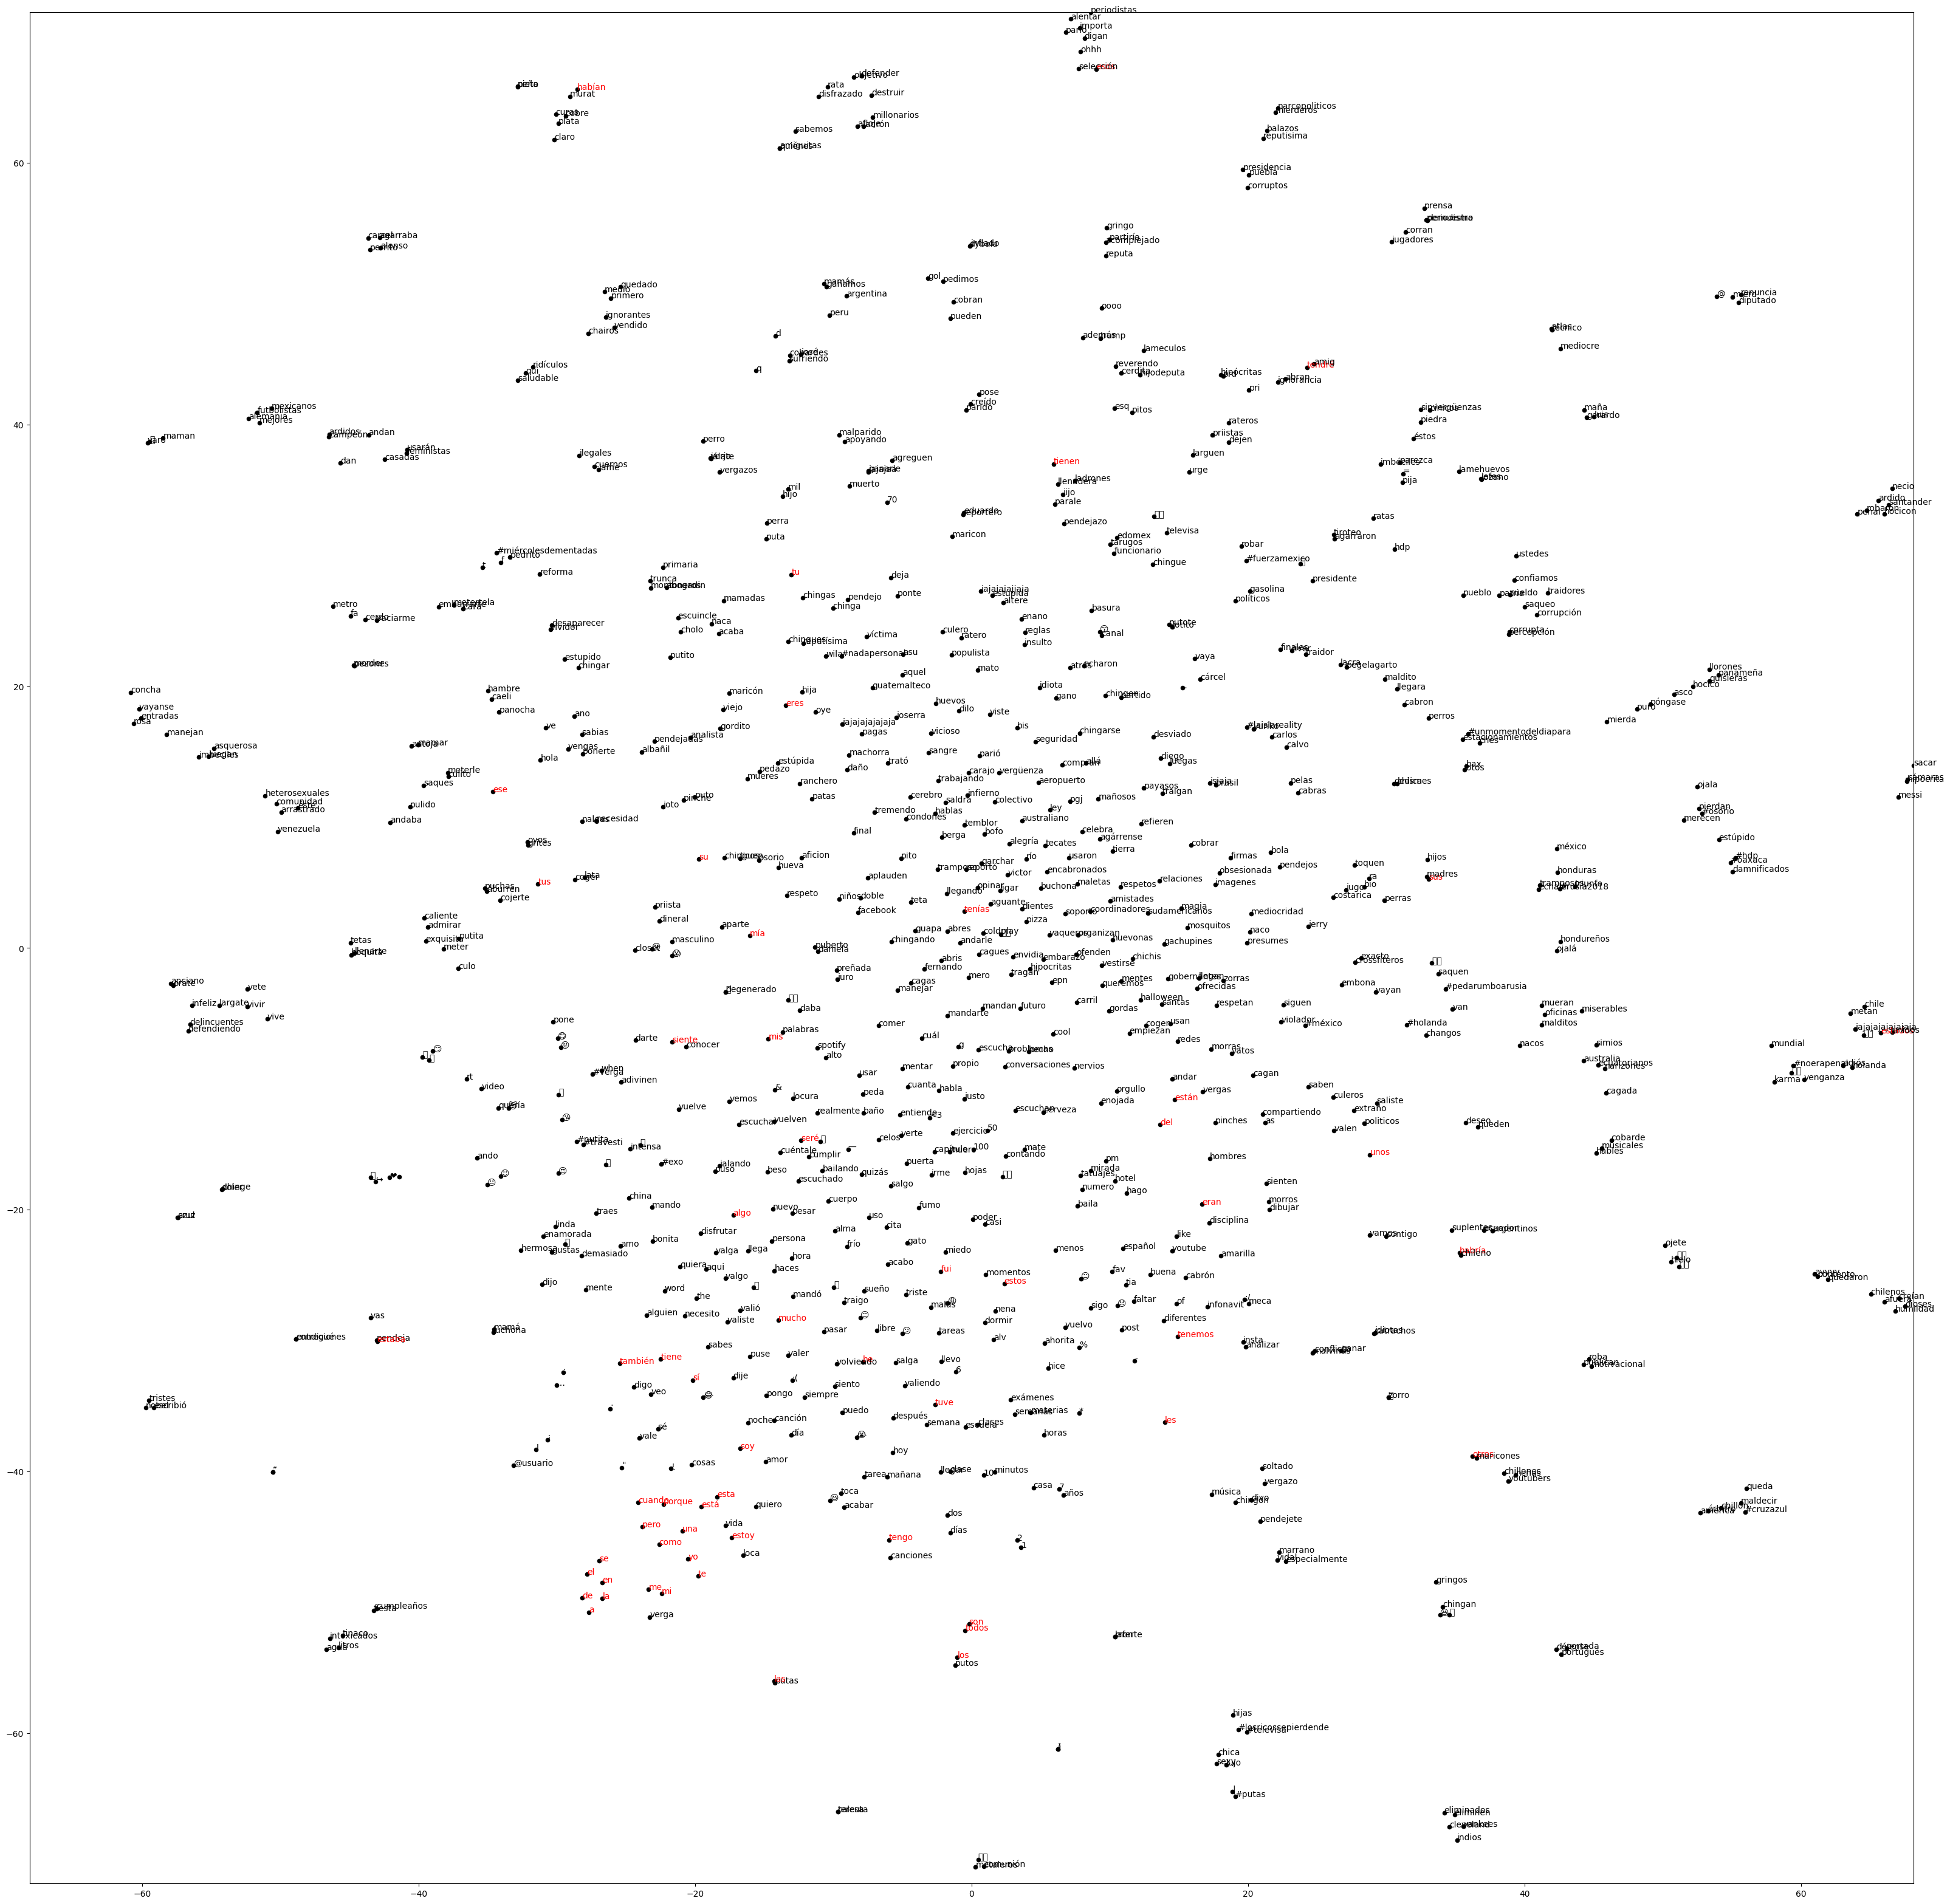

In [99]:
max_x = np.amax(reduced_matrix, axis=0)[0]
max_y = np.amax(reduced_matrix, axis=0)[1]

import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords

sw = set(stopwords.words("spanish"))

plt.figure(figsize=(40, 40), dpi=100)
plt.xlim((-max_x,max_x))
plt.ylim((-max_y,max_y))
plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], 20, color="black");

for idx, word in enumerate(t_words[:]):
    x = reduced_matrix[idx, 0]
    y = reduced_matrix[idx, 1]  
    if word in sw:
        plt.annotate(word, (x,y), color="red")
    else: 
        plt.annotate(word, (x,y), color="black")